In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from inspect import signature

In [40]:
import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
df =pd.read_csv('abalone.csv')

In [51]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#to check for the null values

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [53]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#from the above we can observe that Sex is missing , because values of Sex columns is categorical and categorical 
values do not have mean and percentiles

In [48]:
#converting the categorical feature into binary numeric features
#df =pd.get_dummies(df)

In [47]:
#df.head()

In [54]:
#Analyse the dataset
#correlation matrix
corMat= pd.DataFrame(df.iloc[:,:8].corr()).values
corMat =np.around(corMat, decimals=3)
                         

In [55]:
corMat

array([[1.   , 0.987, 0.828, 0.925, 0.898, 0.903, 0.898],
       [0.987, 1.   , 0.834, 0.925, 0.893, 0.9  , 0.905],
       [0.828, 0.834, 1.   , 0.819, 0.775, 0.798, 0.817],
       [0.925, 0.925, 0.819, 1.   , 0.969, 0.966, 0.955],
       [0.898, 0.893, 0.775, 0.969, 1.   , 0.932, 0.883],
       [0.903, 0.9  , 0.798, 0.966, 0.932, 1.   , 0.908],
       [0.898, 0.905, 0.817, 0.955, 0.883, 0.908, 1.   ]])

In [56]:
#print the correlation with  'Rings'feature
feature_rings =pd.DataFrame(df.iloc[:,:8].corr()).iloc[:-1,-1].sort_values(ascending=False)

In [57]:
print('Features in descending order',list(feature_rings.index))

Features in descending order ['Whole weight', 'Viscera weight', 'Diameter', 'Length', 'Shucked weight', 'Height']


In [58]:
#we are training the model to predict rings, we will remove it from the dataset

y=df["Rings"]
X=df.drop(columns='Rings')

C:\Users\hema\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hema\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hema\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hema\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hema\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hema\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density est

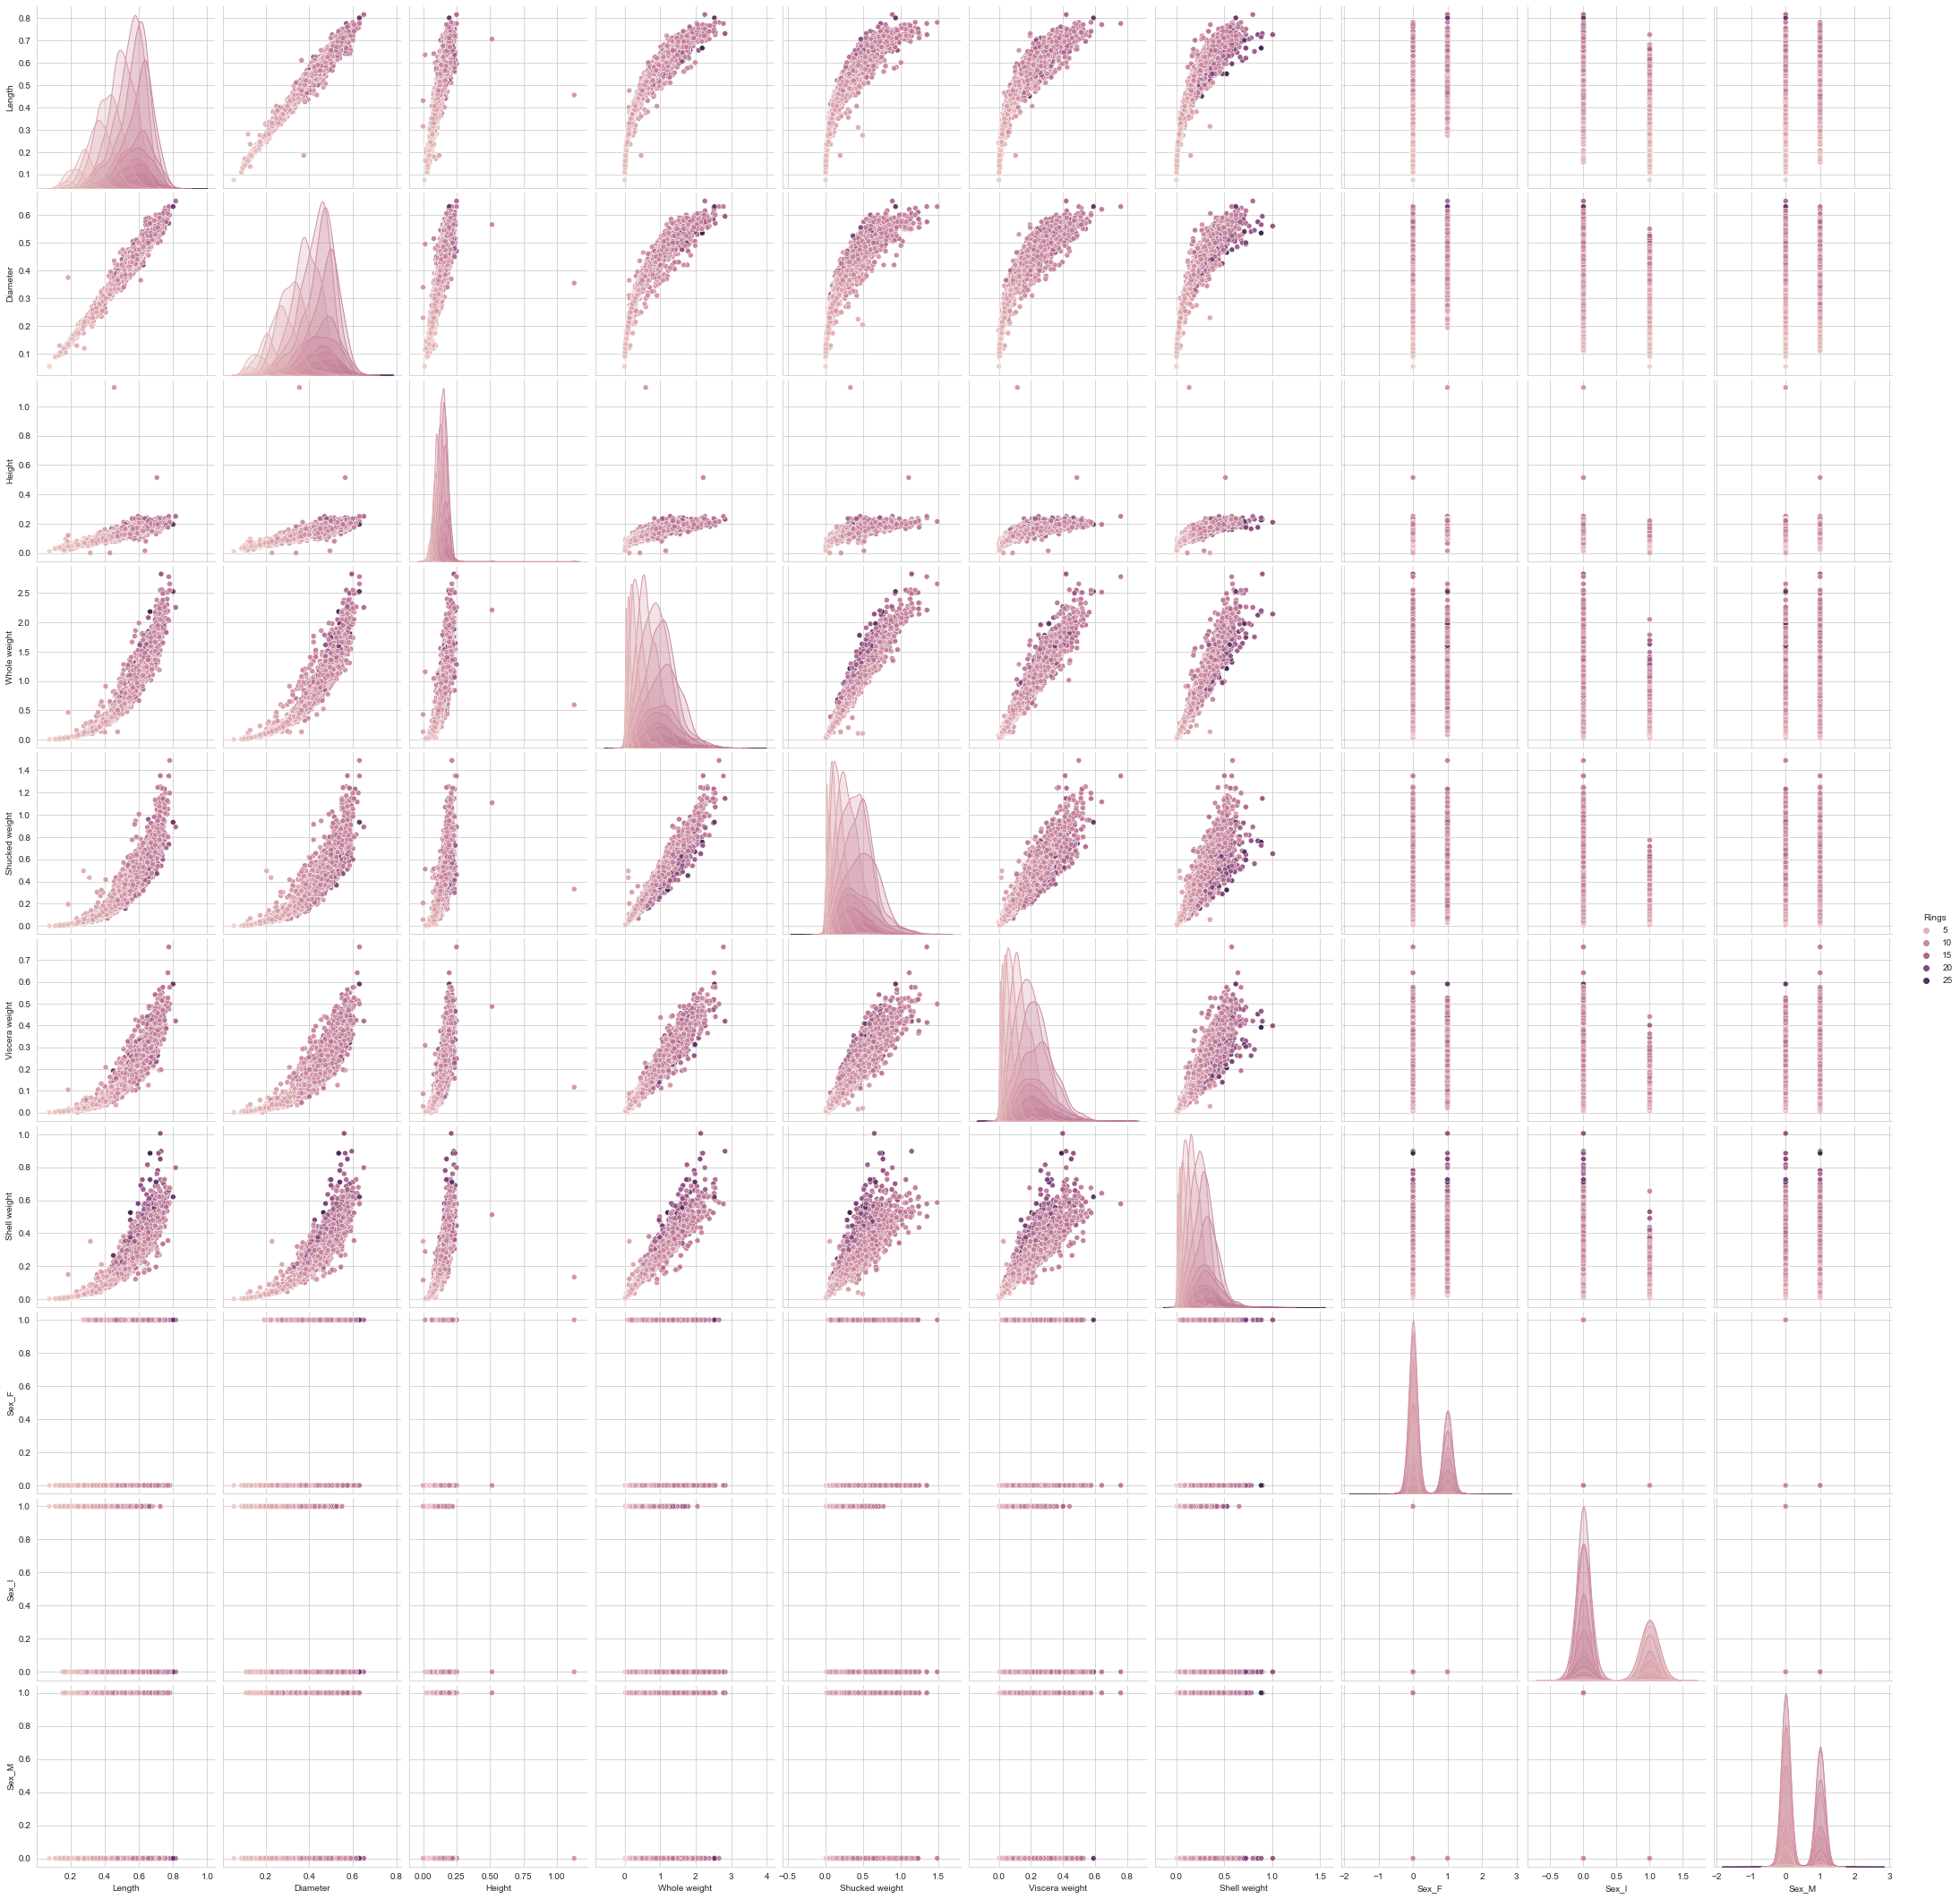

In [46]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Rings', size=3);
plt.show()

In [60]:
X=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]

y=df['Rings']

In [26]:
#split the data into two one for training known as training data and one for evaluation known as test data split the data into 80:20 ratio

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
#showing the  breakdown of the distribution of classes
print('Class counter')
print(y_test.value_counts(), end='\n\n')
print('Class Proportions')
print(y_test.value_counts()/len(y_test))

Class counter
10    136
8     126
9     123
11     96
7      82
12     51
6      46
13     41
14     26
5      26
15     20
16     13
17     12
18     11
4       9
19      7
20      4
21      2
3       2
22      1
26      1
27      1
Name: Rings, dtype: int64

Class Proportions
10    0.162679
8     0.150718
9     0.147129
11    0.114833
7     0.098086
12    0.061005
6     0.055024
13    0.049043
14    0.031100
5     0.031100
15    0.023923
16    0.015550
17    0.014354
18    0.013158
4     0.010766
19    0.008373
20    0.004785
21    0.002392
3     0.002392
22    0.001196
26    0.001196
27    0.001196
Name: Rings, dtype: float64


# algorithm K-nearest Neighbours(KNN)


In [67]:
#initializing classifier and giving hyper parameter k=3

knn=KNeighborsClassifier(n_neighbors=3)

In [68]:
#training classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
#evaluate the classifier
print(knn.score(X_test, y_test))

0.21889952153110048


In [70]:
#try to change the hyperparaeter
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.2284688995215311


we got the accuracy of 0.21 and 0.22 for k=3 and k=5 respectively

In [71]:
#Lets try for Logistic Regression
logr=LogisticRegression(multi_class ='ovr',random_state=3)

In [72]:
#training classifier
logr.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', random_state=3)

In [73]:
#evaluate the classifier
print(logr.score(X_test, y_test))

0.22009569377990432


we got the accuracy as 0.22

In [74]:
#Lets do the Decision tree algorithm
dt=DecisionTreeClassifier(random_state=0, max_depth=3)


In [75]:
#training classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [77]:
#evaluate the classifier
print(dt.score(X_test, y_test))

0.24401913875598086


we got the accuracy 0.24